In [1]:
import sys
import os

# Adjust the path to your build folder where neurosim.so (or neurosim.pyd) lives
build_dir = os.path.expanduser('~/source/NeuroSim/build')
if build_dir not in sys.path:
    sys.path.insert(0, build_dir)


In [2]:
# Import necessary modules
import neurosim
import matplotlib.pyplot as plt
import numpy as np

# Enable inline plotting
%matplotlib inline


Running simulation...


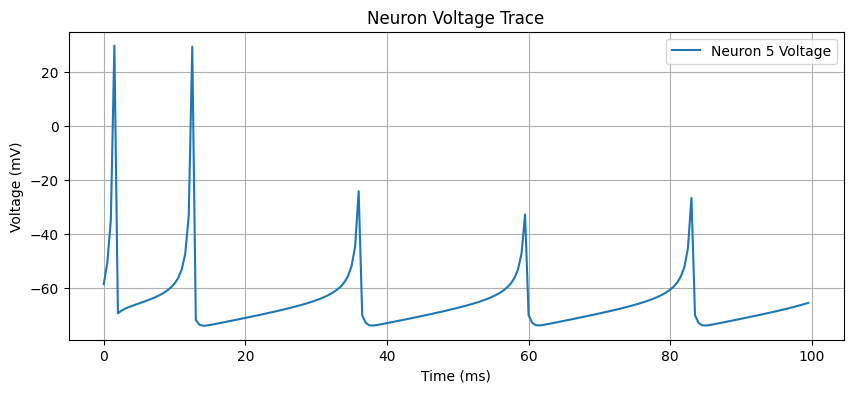

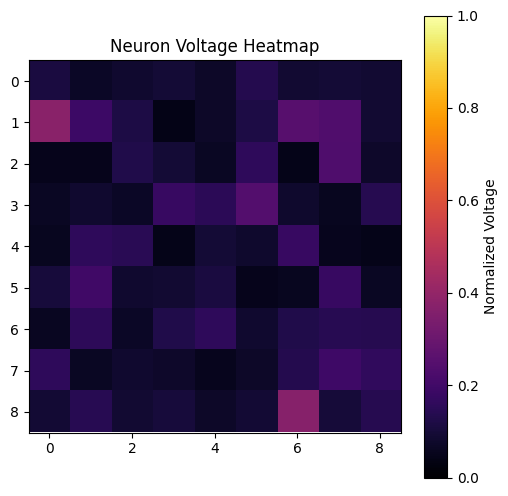

In [3]:
def run_simulation():
    # Create simulation instance with 100 neurons
    sim = neurosim.Simulation(100)

    # Set uniform input current to all neurons
    sim.set_input_current(10.0)

    # Select neuron index 5 for detailed voltage trace
    sim.set_selected_neuron(5)

    time_steps = 200   # Number of simulation steps
    dt = 0.5           # Time step size in ms

    voltage_trace = []  # Container for voltage trace of selected neuron

    print("Running simulation...")

    for _ in range(time_steps):
        sim.step(dt)
        # Retrieve voltage of selected neuron
        voltage = sim.neurons()[sim.get_selected_neuron()].get_voltage()
        voltage_trace.append(voltage)

    # Plot voltage trace over time for selected neuron
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(time_steps)*dt, voltage_trace, label=f'Neuron {sim.get_selected_neuron()} Voltage')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.title('Neuron Voltage Trace')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Generate a 9x9 voltage heatmap grid
    width, height = 9, 9
    voltage_grid = sim.get_voltage_grid(width, height)

    # Reshape flattened vector to 2D grid
    heatmap_data = np.array(voltage_grid).reshape((height, width))

    # Plot the voltage heatmap
    plt.figure(figsize=(6,6))
    plt.imshow(heatmap_data, cmap='inferno', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(label='Normalized Voltage')
    plt.title('Neuron Voltage Heatmap')
    plt.show()

# Run the simulation demo
run_simulation()

Running simulation with synaptic transmission...


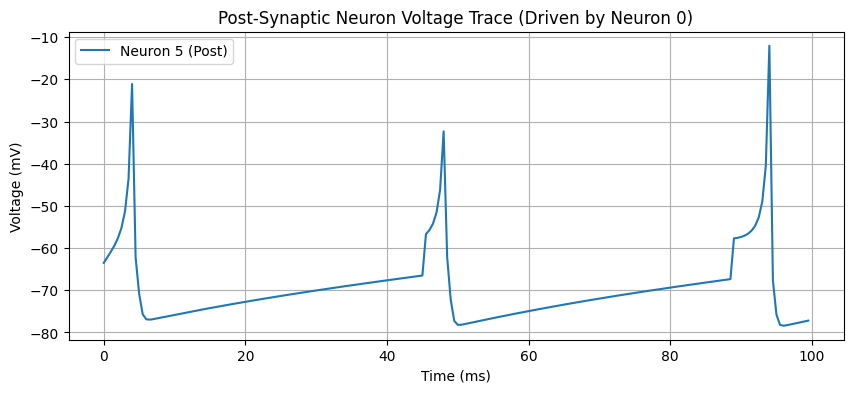

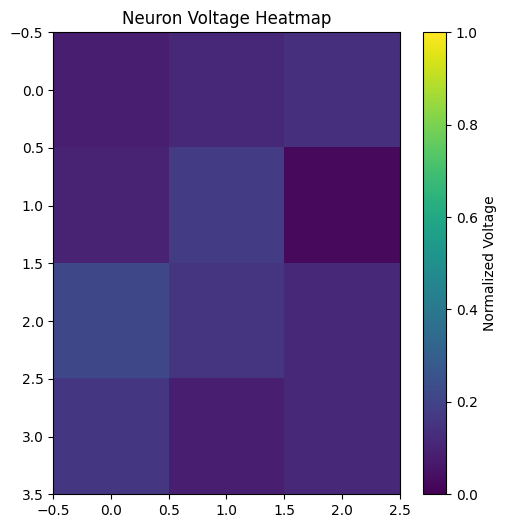

In [4]:
def run_simulation_with_synapse():
    # Create a small simulation with 10 neurons
    sim = neurosim.Simulation(10)

    # Set a baseline current to all neurons
    sim.set_input_current(5.0)

    # Add a strong synapse: Neuron 0 → Neuron 5
    sim.add_synapse(0, 5, 10.0)

    sim.set_selected_neuron(5)  # Track post-synaptic neuron

    time_steps = 200
    dt = 0.5
    voltage_trace = []

    print("Running simulation with synaptic transmission...")

    for _ in range(time_steps):
        sim.step(dt)
        voltage = sim.neurons()[sim.get_selected_neuron()].get_voltage()
        voltage_trace.append(voltage)

    # Plot voltage of the post-synaptic neuron
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(time_steps) * dt, voltage_trace,
             label=f'Neuron {sim.get_selected_neuron()} (Post)')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.title('Post-Synaptic Neuron Voltage Trace (Driven by Neuron 0)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optional heatmap for context
    voltage_grid = sim.get_voltage_grid(3, 4)
    heatmap_data = np.array(voltage_grid).reshape((4, 3))
    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(label='Normalized Voltage')
    plt.title('Neuron Voltage Heatmap')
    plt.show()

# Run this instead of run_simulation()
run_simulation_with_synapse()
